# Step 1: Data Preparation

In [23]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import seaborn as sns


### Reading input data from CSV file

In [24]:
df = pd.read_csv('input.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Dividing dataset into input (X) and output (y) variables

In [25]:
X = df.drop(columns=['diagnosis', 'id'])
y = df['diagnosis']

### Displaying results

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

The features are measurements that describe characteristics of cell nuclei in breast cancer biopsies. Each feature is associated with a specific attribute of the cell nuclei.

Radius, Texture, Perimeter, Area, Smoothness, Compactness, Concavity, Concave points, Symmetry, Fractal Dimension:
These features are computed from images of cell nuclei and represent various geometric and texture-based characteristics.

_mean, _se, _worst:
For each of the attributes listed above, we have three sets of measurements: _mean, _se (standard error), and _worst. These represent different statistics calculated from the mean, standard error, and the "worst" or largest values of each feature for each cell nucleus.

_mean: Represents the mean value of the feature for a set of cells.
_se: Represents the standard error of the feature.
_worst: Represents the worst or largest value of the feature among all the cells.

Having these three sets allows the model to capture different aspects of the data distribution, providing potentially useful information for classification.

For example, radius_mean represent the average radius of cell nuclei, radius_se could represent the variability in the radius, and radius_worst might represent the largest observed radius.

Having these multiple measurements for each feature helps in building a more comprehensive model that takes into account different aspects of the data. However, when applying certain algorithms, it's common to perform feature selection or dimensionality reduction techniques like PCA to reduce the number of features and avoid issues related to the curse of dimensionality.



In [27]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

y represents the output (result) that the model is going to predict based on the input variables it will be trained on. 

# Step 2: Data Analysis and Visualization

### Checking class balance in the dataset

diagnosis
B    357
M    212
Name: count, dtype: int64


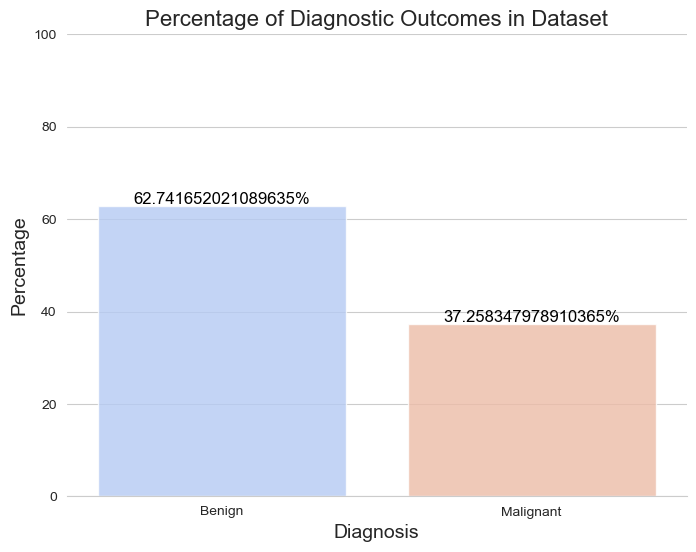

In [28]:
diagnosis_counts = y.value_counts()
print(diagnosis_counts)
total_samples = len(y)
percent_benign = (diagnosis_counts['B'] / total_samples) * 100
percent_malignant = (diagnosis_counts['M'] / total_samples) * 100

fig, ax = plt.subplots(figsize=(8, 6))

# using Seaborn to create the bar plot
sns.barplot(x=['Benign', 'Malignant'], y=[percent_benign, percent_malignant], alpha=0.8, palette="coolwarm")

# Setting plot title and labels
plt.title('Percentage of Diagnostic Outcomes in Dataset', fontsize=16)
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.ylim(0, 100)

# customizing the plot aesthetics
sns.set_style("whitegrid")
sns.despine(left=True)

# annotate the bars with percentage values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# show the plot
plt.show()

### Balacing dataset using oversampling

Before balancing the dataset, our models were always having a higher precision than recall, giving more false negatives than false positives, regardless of the nature of the model, indicating that the model was biased towards the benign class, which is the majority class. And since we're predicting sensitive data (cancer detection), having a false negative value is more harmful than a false positive, hence we have to limit the number of false negatives as much as possible.  
To address this issue, we read an article (https://medium.com/@debtalks/imbalanced-data-classification-oversampling-and-undersampling-297ba21fbd7c) that suggested to apply oversampling on the minority class, using RandomOverSampler, to obtain a balanced dataset and eliminate any possible bias resulting from it.

diagnosis
M    357
B    357
Name: count, dtype: int64


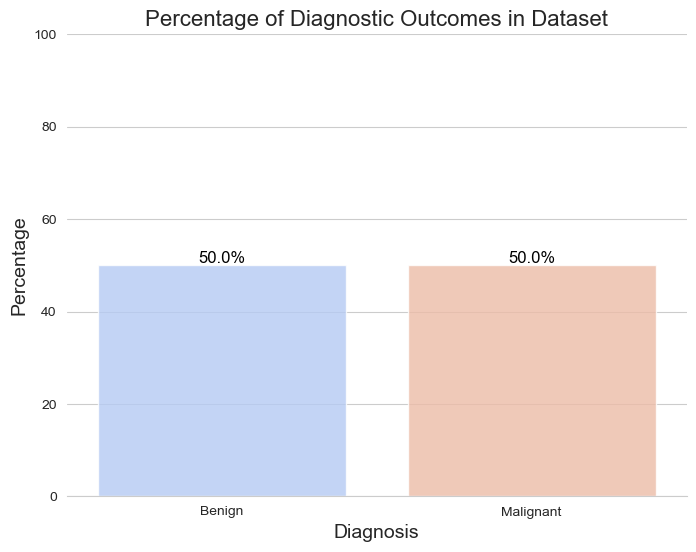

In [29]:
from imblearn.over_sampling import RandomOverSampler

X, y = RandomOverSampler(random_state=10).fit_resample(X, y)

diagnosis_counts = y.value_counts()
print(diagnosis_counts)
total_samples = len(y)
percent_benign = (diagnosis_counts['B'] / total_samples) * 100
percent_malignant = (diagnosis_counts['M'] / total_samples) * 100

fig, ax = plt.subplots(figsize=(8, 6))

# using Seaborn to create the bar plot
sns.barplot(x=['Benign', 'Malignant'], y=[percent_benign, percent_malignant], alpha=0.8, palette="coolwarm")

# Setting plot title and labels
plt.title('Percentage of Diagnostic Outcomes in Dataset', fontsize=16)
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.ylim(0, 100)

# customizing the plot aesthetics
sns.set_style("whitegrid")
sns.despine(left=True)

# annotate the bars with percentage values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# show the plot
plt.show()

Now that the numer of classes is balanced, we ensured that the models we're going to build are not going to be biased towards any class.

### Checking correlation between dataset features

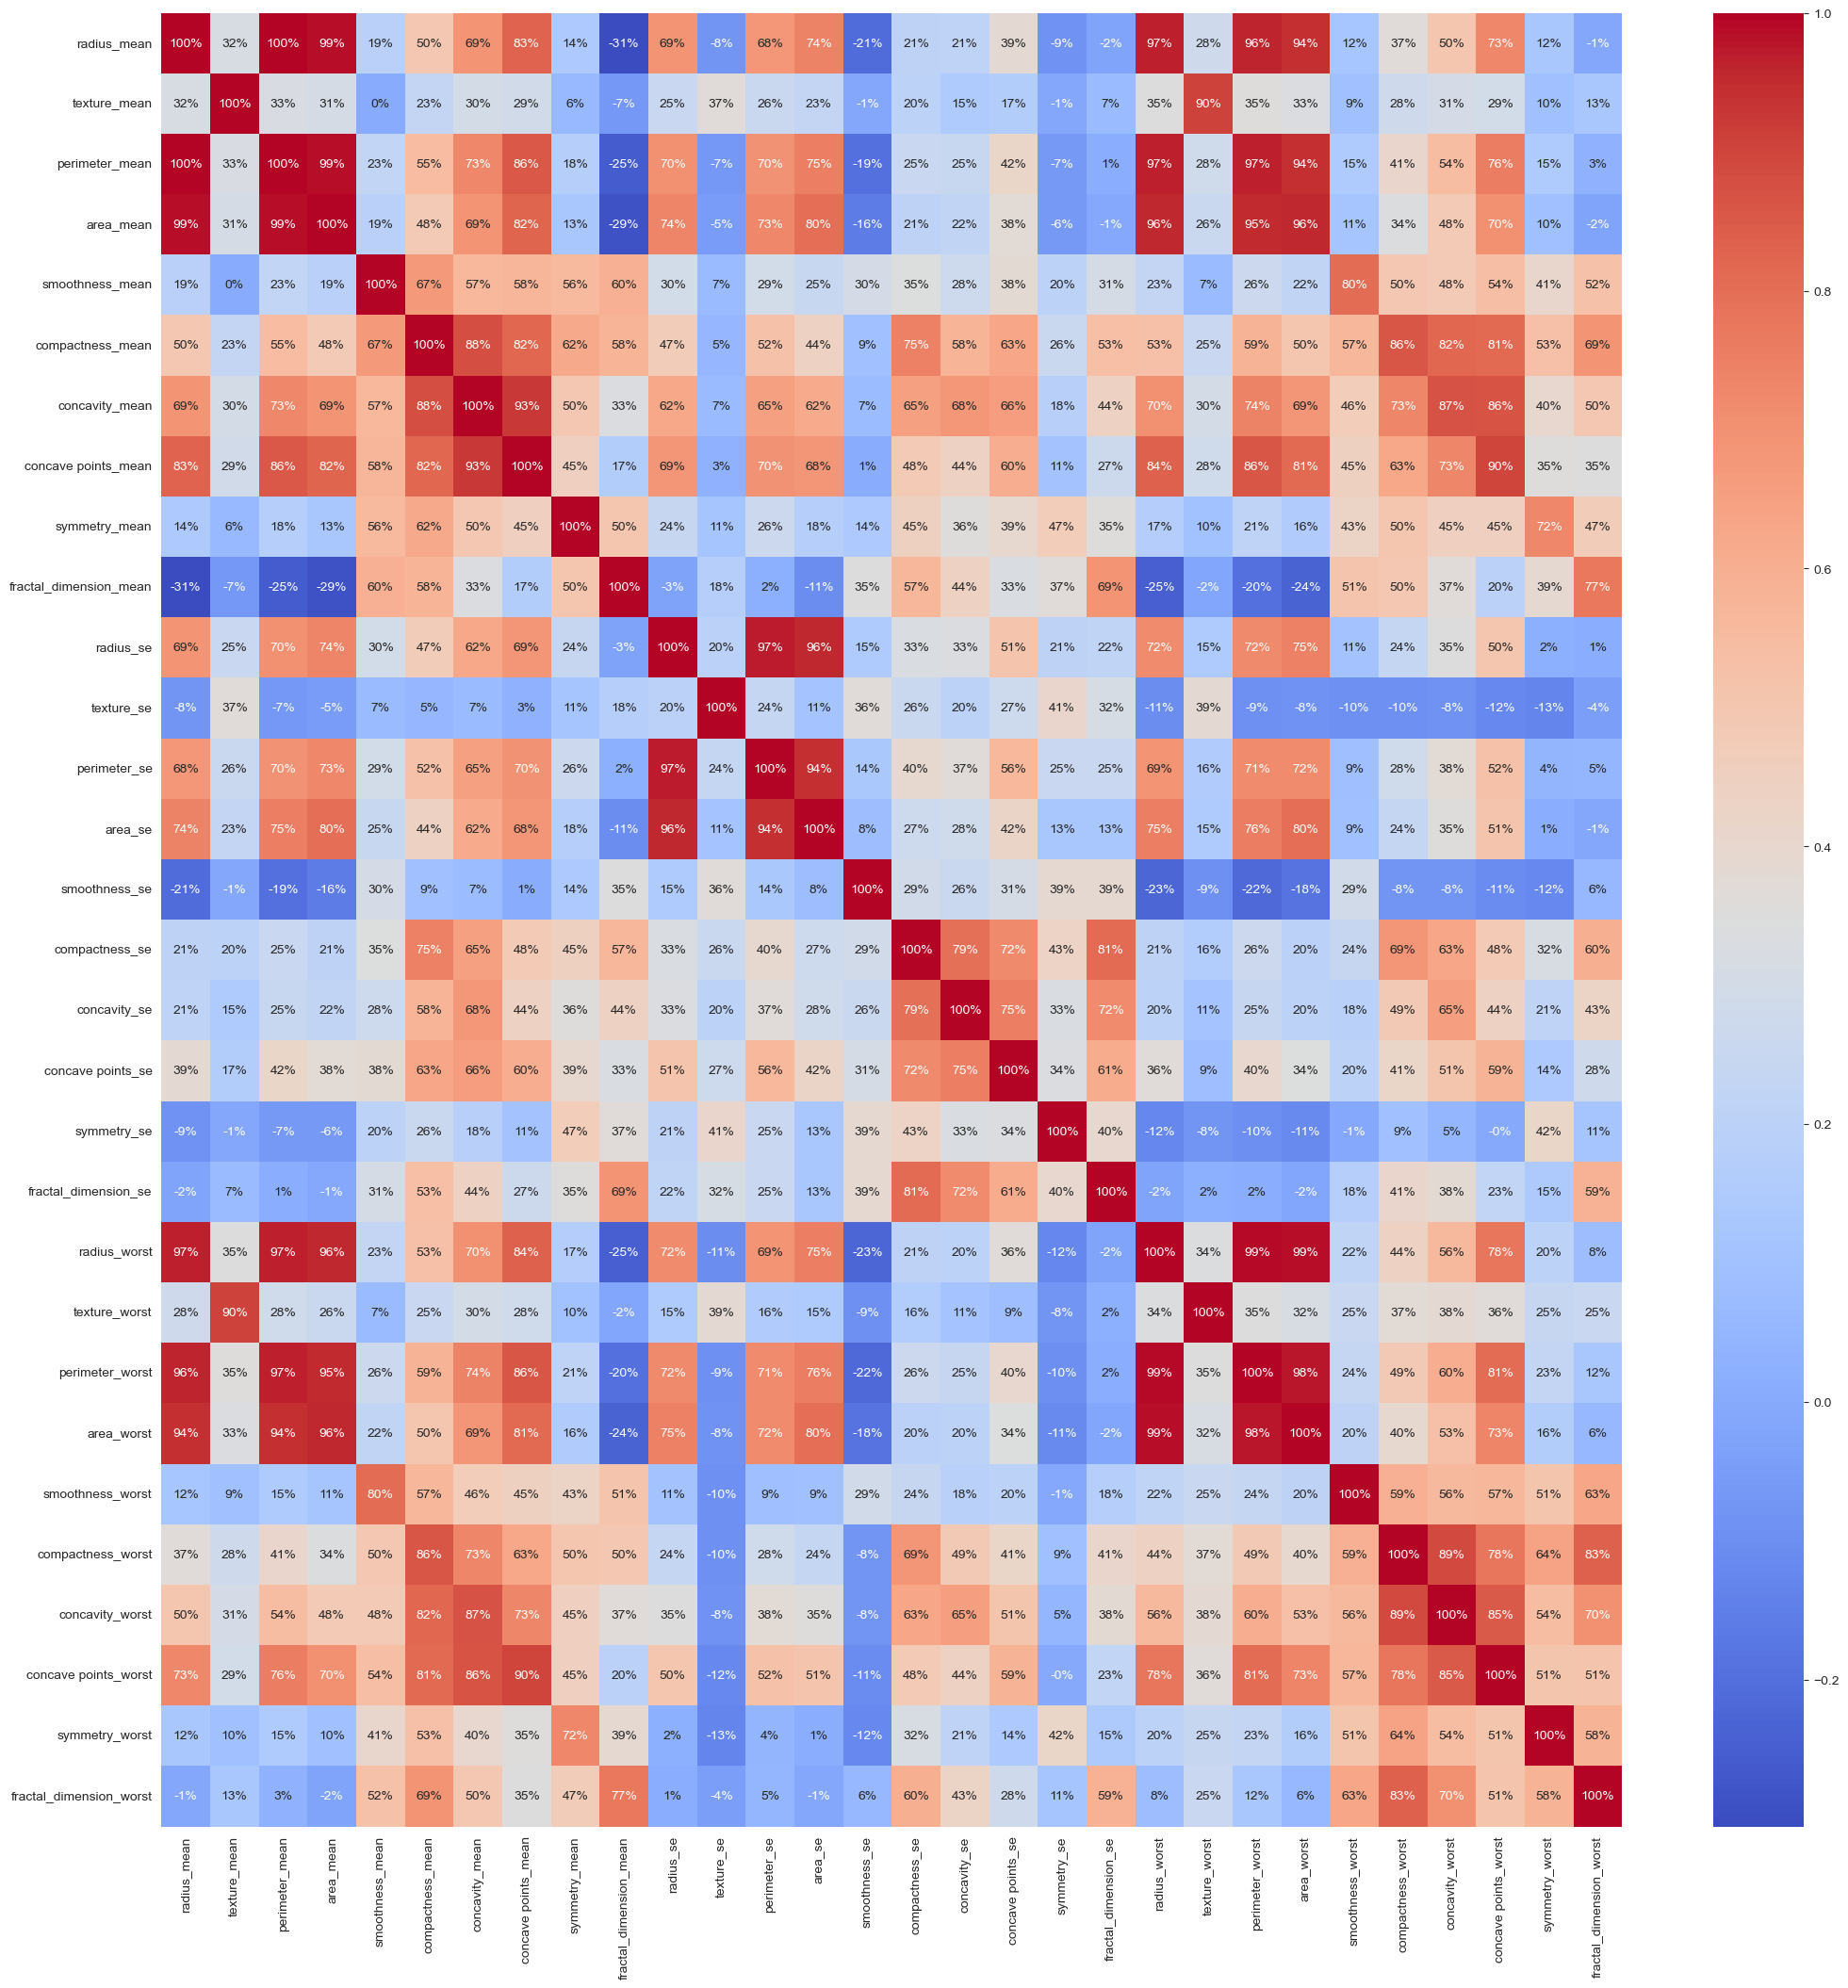

In [30]:
# Getting the correlation between columns
correlation_matrix = X.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, fmt='.0%' , cmap='coolwarm')
plt.show()


As we notice, there are many orange/red cells, which indicate a high correlation between the features. This means that there might be a redundancy in the features, and we will address this problem later by trying to apply feature selection.

# Step 3: Data Preprocessing

## 1) Checking for null values

In [31]:
print(X.isnull().sum())
print("y: ", y.isnull().sum())

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
y:  0


There are no null values in the data

## 2) Encoding categorical variables using Label Encoder

In [32]:
# We check the data type of each feature to check which ones conntains labels
print(X.dtypes)
print('y: ', y.dtypes)

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

y contains two variables: B (for Benign) and M (for Malignant). These variables are not nominal, and can be considered as ordinal (positive > negative). As such, there is no need to use one-hot encoding and create dummy variables for each column. We can directly apply label encoding using LabelEncoder to transform B to 0 and M to 1.

In [33]:
# Only y contains label values, we encode them using LabelEncoder (0 for Benign, 1 for Malignant)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

## 3) Dividing data into training and testing

While dividing the dataset into training and testing, it would be better if we ensure that the benign/malignant ratio is preserved in both training and testing data, so we added "stratify=y" parameter

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=54)

print("X train shape: ", X_train.shape)
print("X test shape: ", X_test.shape)
print("y train shape: ", y_train.shape)
print("y test shape: ",y_test.shape)

X train shape:  (571, 30)
X test shape:  (143, 30)
y train shape:  (571,)
y test shape:  (143,)


## 4) Scaling (Standardization)


We scale our data so that it becomes standard, with all features having a mean of 0 and std of 1. Bringing data to a common scale, allowing the feature selection algorithm to assess their importance based on their actual contributions to the outcome

In [35]:
# We standardize our data to have a mean of 0 and a standard deviation of 1, which is essential for PCA, and 
# improves the performance of algorithms like Logistic Regression and XGBoost.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5) Feature Selection using PCA

Our input data consists of 30 features, and when we visualized the correlation between features, we observed a high correlation between them. This can lead to overfitting, because the model might capture noise or specific details of the training set that do not generalize well to new, unseen data. Hence, we will try to apply PCA technique to decrease the number of features while preserving essential information, and evaluate how our models responds to it.
PCA does not eliminate any existing features, it combines them in a smart way, and produces new features that are called "principal features". In this way, we can reduce the number of features without losing much information.
To find the optimal number of principal components, we read an article about PCA (https://mikulskibartosz.name/pca-how-to-choose-the-number-of-components) that suggested to select the minimum number of components required to achieve a cumulative variance of 95%. Hence, we will plot the number of principal components compared to the cumulative variance, to deduce the minimum number of required principal components.

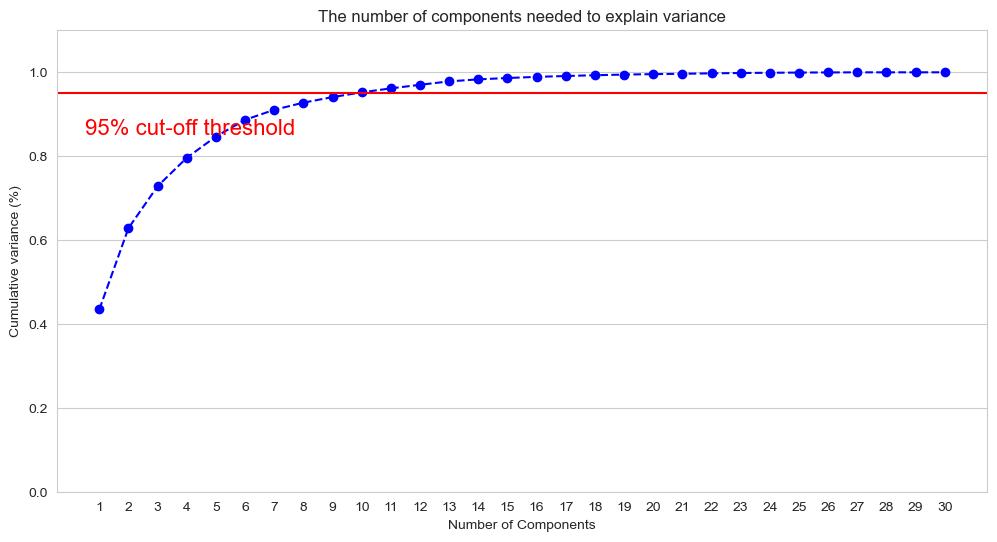

In [36]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_scaled)
plt.rcParams["figure.figsize"] = (12, 6)

fig, ax = plt.subplots()

xi = np.arange(1, len(pca.explained_variance_ratio_) + 1, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0, 1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1, step=1))  # Start from 1
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color='red', fontsize=16)

ax.grid(axis='x')
plt.show()


Based on the plot, we can deduce that 10 components are required to reach the 95% cumulative variance, hence we apply PCA with 10 principal components

In [37]:
n_components = 10  # value deduced from the plot
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled) # we use transform instead of fit_transform the seccond time

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.43540455, 0.19371699, 0.09977716, 0.06759999, 0.05064129,
       0.03970534, 0.023914  , 0.01697855, 0.01328156, 0.01131007])

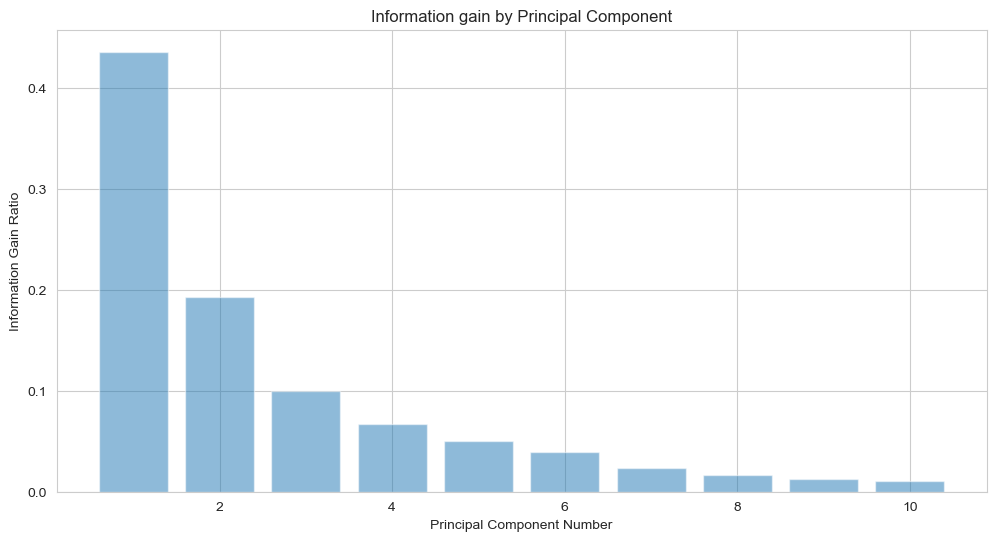

In [38]:
# Visualizing pca columns variances representing information gained
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.xlabel('Principal Component Number')
plt.ylabel('Information Gain Ratio')
plt.title('Information gain by Principal Component')
plt.show()

The principal components are arranged in order of importance, with the most significant ones holding the most information. Therefore, by combining the first two principal components, we should start observing distinct groupings of each class.

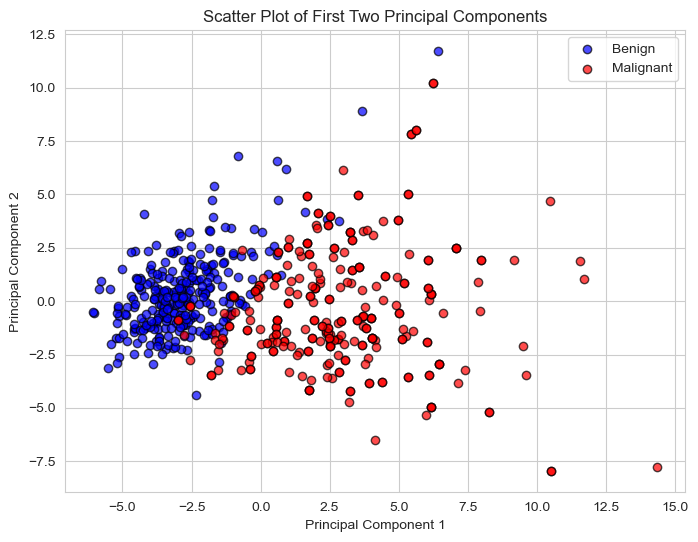

In [39]:
pc1 = X_train_pca[:, 0]
pc2 = X_train_pca[:, 1]

# Separate data based on class labels
benign_indices = (y_train == 0)
malignant_indices = (y_train == 1)

# Scatter plot for benign class
plt.figure(figsize=(8, 6))
plt.scatter(pc1[benign_indices], pc2[benign_indices], c='blue', label='Benign', edgecolor='k', alpha=0.7)

# Scatter plot for malignant class
plt.scatter(pc1[malignant_indices], pc2[malignant_indices], c='red', label='Malignant', edgecolor='k', alpha=0.7)

# Add legend
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of First Two Principal Components')
plt.show()


The division is not perfect because we selected only two principal components out of 10, but it's evident that the algorithm is starting to distinguish between benign cells and malignant cells. (each are grouped together)

# Step 4 and 5: Data Regularization and Model Selection

In general, the most efficient models for binary classification includes Logistic Regression, Random Forest, Support Vector Machine and XGBoost. We train our data on each of these models, and then we select the one that resulted in the highest accuracy. To decide what type of data (normal, standardized, or with pca) to train each model on, we read the following article: https://builtin.com/data-science/when-and-why-standardize-your-data

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

def cross_validate_model(model, X, y, num_folds=15):
    # we use stratified k-fold cross-validation
    cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
    # performing cross validation
    cross_val_scores = cross_val_score(model, X, y, cv=cv)
    # calculating mean accuracy
    accuracy_cv = cross_val_scores.mean()
    return accuracy_cv

# Creating logistic regression model
logreg_model = LogisticRegression(max_iter=20000)
logreg_accuracy_cv = cross_validate_model(logreg_model, X_train_scaled, y_train)


# Creating logistic regression model with pca
logreg_pca_model = LogisticRegression(max_iter=20000)
logreg_pca_accuracy_cv = cross_validate_model(logreg_pca_model, X_train, y_train)


# Creating a regularized logistic regression model
regularized_logreg_model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=20000)
regularized_logreg_accuracy_cv = cross_validate_model(logreg_model, X_train_scaled, y_train)

# Creating a random forest model
rf_model = RandomForestClassifier(random_state=80)
rf_accuracy_cv = cross_validate_model(rf_model, X_train, y_train)

# Creating a random forest model with pca
rf_pca_model = RandomForestClassifier(random_state=80)
rf_pca_accuracy_cv = cross_validate_model(rf_pca_model, X_train_pca, y_train)

# Creating an xgboost model 
xgb_model = XGBClassifier()
xgb_accuracy_cv = cross_validate_model(xgb_model, X_train_scaled, y_train)

# Creating an xgboost model with pca
xgb_pca_model = XGBClassifier()
xgb_pca_accuracy_cv = cross_validate_model(xgb_pca_model, X_train_pca, y_train)

# Creating an svm model
svm_model = SVC(probability=True)
svm_accuracy_cv = cross_validate_model(svm_model, X_train_scaled, y_train)

# Creating an svm model with pca
svm_pca_model = SVC(probability=True)
svm_pca_accuracy_cv = cross_validate_model(svm_model, X_train_pca, y_train)


In [41]:
# We display the results in a table by creating a dictionary and parsing it to a pandas df
results = {
    'Model': [
        'Logistic Regression', 
        'Logistic Regression with PCA', 
        'Regularized Logistic Regression', 
        'Random Forest', 
        'Random Forest with PCA', 
        'XGBoost', 
        'XGBoost with PCA', 
        'SVM', 
        'SVM with PCA', 
    ],
    'Average Accuracy': [
        logreg_accuracy_cv,
        logreg_pca_accuracy_cv,
        regularized_logreg_accuracy_cv,
        rf_accuracy_cv,
        rf_pca_accuracy_cv,
        xgb_accuracy_cv,
        xgb_pca_accuracy_cv,
        svm_accuracy_cv,
        svm_pca_accuracy_cv
    ]
}

# Create a sorted DataFrame from the dictionary
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Average Accuracy', ascending=False)
results_df


,Model,Average Accuracy
3,Random Forest,0.978992
6,XGBoost with PCA,0.977193
5,XGBoost,0.975484
8,SVM with PCA,0.973729
7,SVM,0.968466
4,Random Forest with PCA,0.968421
0,Logistic Regression,0.966712
2,Regularized Logistic Regression,0.966712
1,Logistic Regression with PCA,0.952722


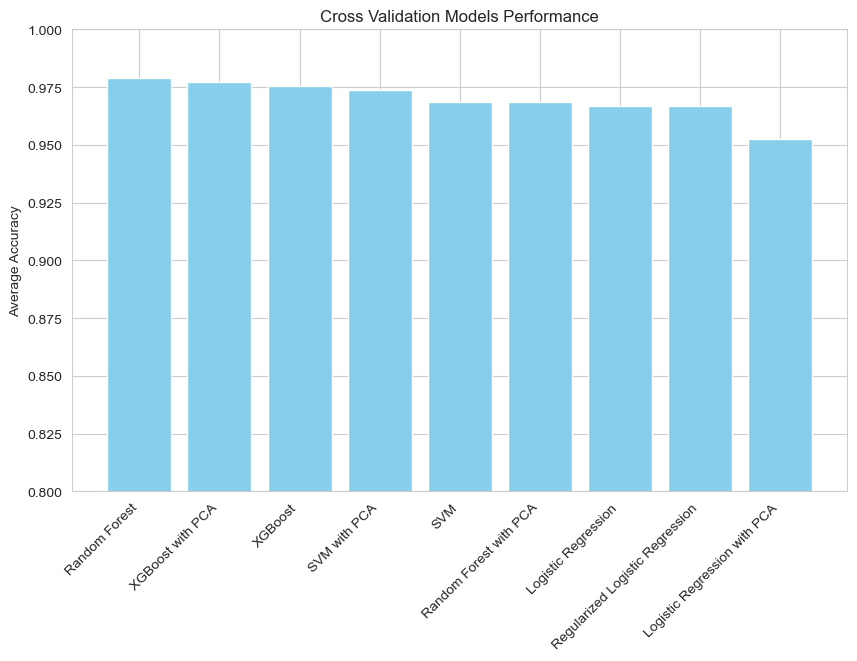

In [42]:
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Average Accuracy'], color='skyblue')
plt.ylabel('Average Accuracy')
plt.title('Cross Validation Models Performance')
plt.ylim(0.8, 1)  
plt.xticks(rotation=45, ha='right')
plt.show()


# Step 6: Hyperparameter Tuning on promising models

Based on the results of Cross Validation, we deduced that XGBoost and Random Forest are the two algorithms that generalized the most on the testing data. To check if the models can be further improved before choosing a final model, we apply Hyperparameter Tuning on the promising models. 

### Applying hyperparameter tuning on XGBoost

In [56]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.1, 0.2],
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'subsample': [0.9, 1.0],
    'colsample_bytree': [0.9, 1.0]
}

# Instantiate the XGBoost classifier
xgb_model = XGBClassifier()

# Instantiate GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5)

# Fit the model to the training data
grid_search_xgb.fit(X_train_pca, y_train)

# Get the best hyperparameters
best_params_xgb = grid_search_xgb.best_params_

# Get all hyperparameter combinations and their respective scores
xgb_results = pd.DataFrame(grid_search_xgb.cv_results_)

# Extract relevant columns from the results
xgb_results = xgb_results[['param_learning_rate', 'param_n_estimators', 'param_max_depth', 'param_subsample', 'param_colsample_bytree', 'mean_test_score']]
xgb_results = xgb_results.sort_values(by='mean_test_score', ascending=False)

# Display the results in a table
print("\nBest Hyperparameters for XGBoost with PCA:", best_params_xgb)

print("Hyperparameter Tuning Results for XGBoost with PCA:")
xgb_results



Best Hyperparameters for XGBoost with PCA: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.9}
Hyperparameter Tuning Results for XGBoost with PCA:


,param_learning_rate,param_n_estimators,param_max_depth,param_subsample,param_colsample_bytree,mean_test_score
22,0.2,200,5,0.9,0.9,0.980732
42,0.2,200,4,0.9,1.0,0.980732
37,0.2,100,3,1.0,1.0,0.978978
16,0.2,100,4,0.9,0.9,0.978978
46,0.2,200,5,0.9,1.0,0.978978
18,0.2,200,4,0.9,0.9,0.978978
39,0.2,200,3,1.0,1.0,0.978978
40,0.2,100,4,0.9,1.0,0.978978
2,0.1,200,3,0.9,0.9,0.978978
6,0.1,200,4,0.9,0.9,0.978963


### Applying hyperparameter tuning on Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
# Define a reduced parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', None]
}


# Instantiate the Random Forest classifier
rf_model = RandomForestClassifier(random_state=45)

# Instantiate GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5)

# Fit the model to the training data
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_

# Get all hyperparameter combinations and their respective scores
rf_results = pd.DataFrame(grid_search_rf.cv_results_)

# Extract relevant columns from the results
rf_results = rf_results[['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'param_max_features', 'mean_test_score']]
rf_results = rf_results.sort_values(by='mean_test_score', ascending=False)

# Display the results in a table
print("\nBest Hyperparameters for Random Forest:", best_params_rf)

print("Hyperparameter Tuning Results for Random Forest:")
rf_results



Best Hyperparameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Hyperparameter Tuning Results for Random Forest:


,param_n_estimators,param_max_depth,param_min_samples_split,param_min_samples_leaf,param_max_features,mean_test_score
2,150,None,2,1,sqrt,0.975500
49,100,20,2,1,sqrt,0.975500
50,150,20,2,1,sqrt,0.975500
1,100,None,2,1,sqrt,0.975500
26,150,10,2,1,sqrt,0.975500
...,...,...,...,...,...,...
21,50,None,5,2,None,0.950969
69,50,20,5,2,None,0.950969
15,50,None,5,1,None,0.947460
63,50,20,5,1,None,0.947460


### Comparing the best models of each algorithm

In [55]:
best_xgb_mean_test_score = grid_search_xgb.best_score_
best_rf_mean_test_score = grid_search_rf.best_score_


# Create DataFrames for the best models
best_xgb_df = pd.DataFrame({
    'Model': ['XGBoost with PCA'],
    'Mean Test Score': [best_xgb_mean_test_score]
})

best_rf_df = pd.DataFrame({
    'Model': ['Random Forest'],
    'Mean Test Score': [best_rf_mean_test_score]
})

# Concatenate the DataFrames
comparison_df = pd.concat([best_xgb_df, best_rf_df], ignore_index=True)

# Display the comparison DataFrame
print("Model Comparison:")
comparison_df


Model Comparison:


,Model,Mean Test Score
0,XGBoost with PCA,0.980732
1,Random Forest,0.975500


### Creating final model

After performing hyperparameter tuning, we notice that XGBoost, with its optimal parameters, outperformed Random Forest algorithm, so we will proceed with XGBoost as our final model to evaluate the data of competition dataset.

In [54]:
final_model = XGBClassifier(**best_params_xgb)
final_model.fit(X_train_pca, y_train)
final_y_predicted = final_model.predict(X_test_pca)
final_accuracy = accuracy_score(y_test, final_y_predicted)
final_accuracy


0.986013986013986

# Step 6 : Model Evaluation

Evaluating the performance of Logistic Regression model on the testing data.

### Confusion Matrix

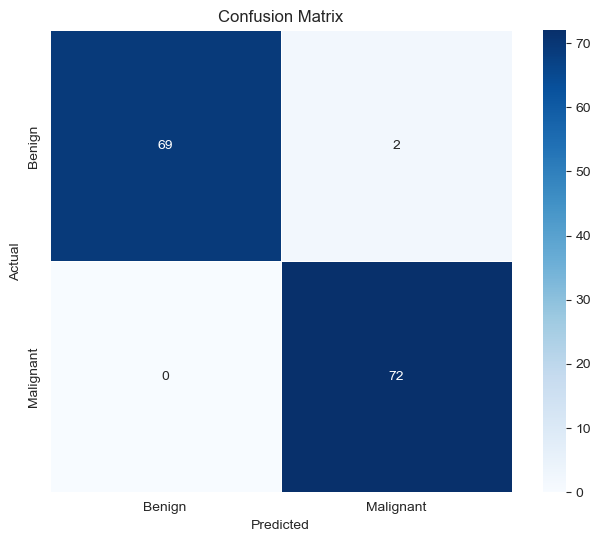

In [47]:
# Confusion Matrix
# Since the selected model is logistic regression
cm = confusion_matrix(y_test, final_y_predicted)

# creaing the heatmap of the confusion matrix
plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5, square=True,
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])

# we add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# we show the plot
plt.show()

In [48]:
# Calculating precision, recall, f1, and accuracy, and visualizing them in a table
precision = precision_score(y_test, final_y_predicted)
recall = recall_score(y_test, final_y_predicted)
accuracy = accuracy_score(y_test, final_y_predicted)
f1 = f1_score(y_test, final_y_predicted)

results = {
    'Name': ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
    'Value': [precision, recall, f1, accuracy]
}
# Create a DataFrame from the dictionary
results_df = pd.DataFrame(results)
results_df



,Name,Value
0,Precision,0.972973
1,Recall,1.000000
2,F1 Score,0.986301
3,Accuracy,0.986014


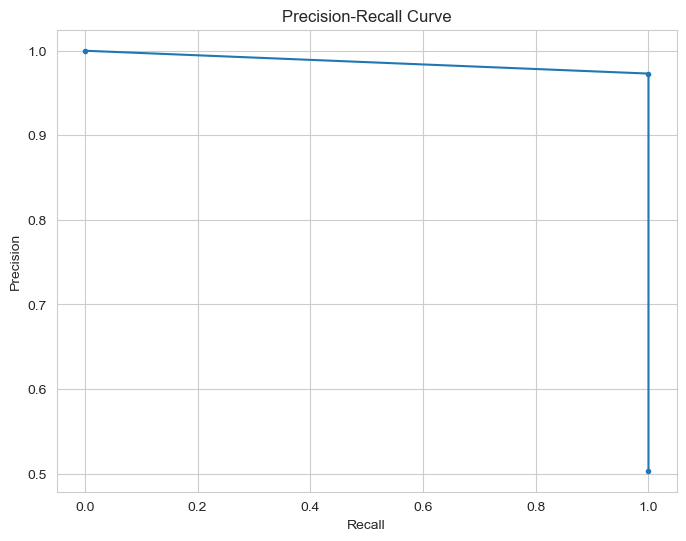

In [49]:
# Visualizing precision and recall using the precision-recall curve

# Calculate precision and recall values at various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, final_y_predicted)
x
# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


# Step 7 : Predicting competition data and visualizing results

### 1) Retrieving new data and cleaning it

In [50]:
# Loading new data from the csv file
new_data = pd.read_csv('WBCD2.csv')

# Specifying input data (features)
X_new = new_data.drop('id', axis=1)

# Scaling X_new to fit the same format of the data on which the model was trained, using the same object used 
# for training
X_new_scaled = scaler.transform(X_new) # we use transform instead of fit_transform since we're using same object

# Applying PCA to the scaled new data using the same PCA object used for training (hence we use transform)
X_new_pca = pca.transform(X_new_scaled) # we use transform instead of fit_transform since we're using same object

### 2) Making predictions and inserting them into an excel sheet

In [60]:
# Saving data in the excel sheet
result_df = pd.DataFrame({
    'id': new_data['id'], 
    'result': y_pred_new
})

# Mapping 0 to 'B' and 1 to 'M'
result_df['result'] = result_df['result'].replace({0: 'B', 1: 'M'})

# Save the DataFrame to a new Excel sheet
result_df.to_csv('predictions.csv', index=False)

# Display the DataFrame
result_df

,id,result
0,119513,M
1,8423,M
2,842517,M
3,843483,M
4,843584,M
...,...,...
193,942640,M
194,943471,M
195,94547,M
196,947204,M


### 3) Visualizing calculated probabilities of the competition data

In [58]:
import numpy as np

y_pred_proba_new = final_model.predict_proba(X_new_pca)

# Initialize empty arrays for benign and malignant probabilities
benign_probabilities = []
malignant_probabilities = []

# Loop through each array in y_pred_proba_new
for prob_array in y_pred_proba_new:
    # Compare the first and second elements
    if prob_array[0] > prob_array[1]:
        # Add the first element to benign_probabilities
        benign_probabilities.append(prob_array[1])
    else:
        # Add the second element to malignant_probabilities
        malignant_probabilities.append(prob_array[1])


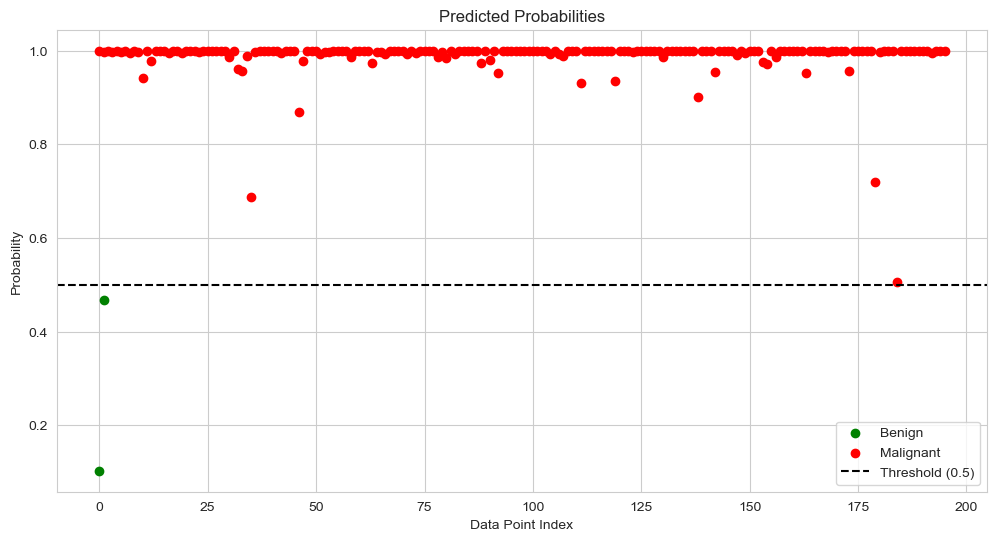

In [59]:
# Create a scatter plot
plt.scatter(range(len(benign_probabilities)), benign_probabilities, label='Benign', color='green')
plt.scatter(range(len(malignant_probabilities)), malignant_probabilities, label='Malignant', color='red')

# Draw a horizontal line at the threshold of 0.5
plt.axhline(y=0.5, color='black', linestyle='--', label='Threshold (0.5)')

# Customize the plot
plt.title('Predicted Probabilities')
plt.xlabel('Data Point Index')
plt.ylabel('Probability')
plt.legend()
plt.show()

In a typical scenario, we would have reduced the threshold value to 0.45, ensuring that the model favor false 
positives over false negatives (since a false positive is less damaging than a false positive in the case of cancer diagnogis). But since we're in a competition, our emphasis is on achieving the highest accuracy possible, and thus we will maintain the standard threshold for optimal overall performance

# Conclusion

In conclusion, this breast cancer detection project has yielded promising results in predicting malignancy based on features extracted from medical images. The machine learning model, trained on a comprehensive dataset, demonstrated high accuracy in distinguishing between benign and malignant cases, providing a valuable tool for early diagnosis. The practical implications of this project are significant, as early detection of breast cancer is crucial for timely intervention and improved patient outcomes. The model's ability to accurately classify cases with a high degree of confidence showcases its potential as an effective support tool for healthcare professionals.

Moving forward, there are several avenues for future improvements. Firstly, incorporating additional diverse datasets could enhance the model's robustness and generalization to different populations. Additionally, exploring advanced imaging techniques or incorporating other relevant clinical data could further improve the model's performance. Continuous refinement through ongoing model updates and validations with new data will be essential to ensure its relevance and reliability in real-world clinical settings. Collaborative efforts with medical professionals and researchers will be instrumental in refining the model and integrating it seamlessly into the existing healthcare infrastructure. Overall, this project marks a significant step forward in leveraging machine learning for breast cancer detection, and future enhancements hold the potential to make substantial contributions to the field of medical diagnostics.